<a href="https://colab.research.google.com/github/GANPSO/DFCA-GAN-U-Net/blob/main/DFCA_U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**U-NET trained with ISIC 2016** (900 train 379 test)


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.7241 - loss: 0.6063 - val_accuracy: 0.7195 - val_loss: 0.4933
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 90s 936ms/step - accuracy: 0.7800 - loss: 0.4565 - val_accuracy: 0.8315 - val_loss: 0.4050
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 78s 859ms/step - accuracy: 0.8368 - loss: 0.4093 - val_accuracy: 0.8145 - val_loss: 0.4467
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 87s 943ms/step - accuracy: 0.8291 - loss: 0.4147 - val_accuracy: 0.8433 - val_loss: 0.3907
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 77s 858ms/step - accuracy: 0.8407 - loss: 0.3940 - val_accuracy: 0.8409 - val_loss: 0.3884
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 88s 959ms/step - accuracy: 0.8535 - loss: 0.3693 - val_accuracy: 0.8746 - val_loss: 0.3125
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 56s 983ms/step - accuracy: 0.8825 - loss: 0.3086 - val_accuracy: 0.8846 - val_loss: 0.3083
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 77s 903ms/step - accuracy: 0.8992 - loss: 0.2694 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


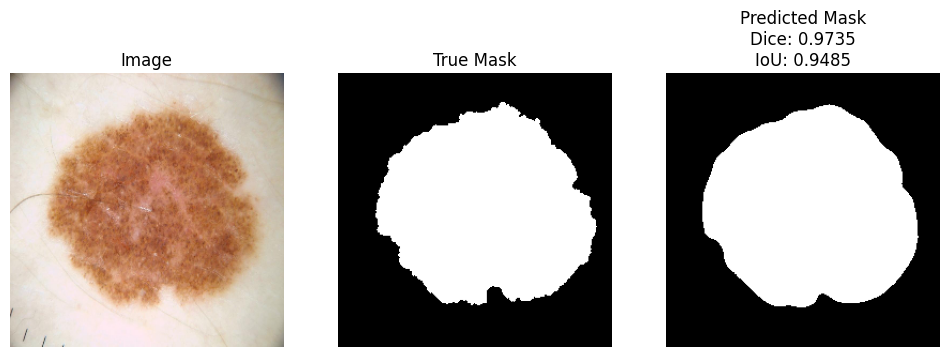

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


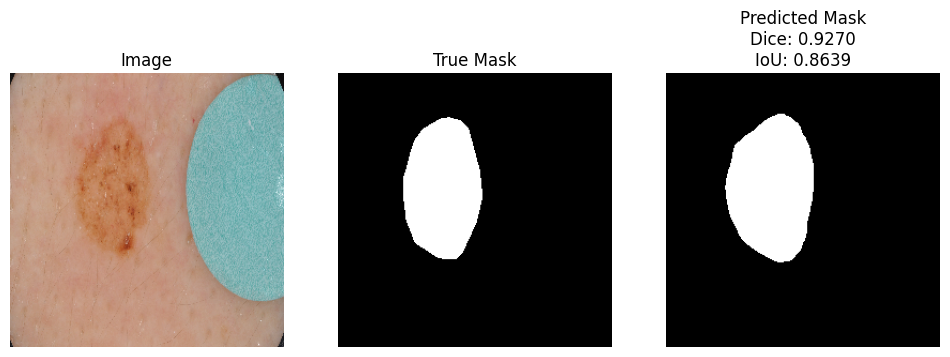

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


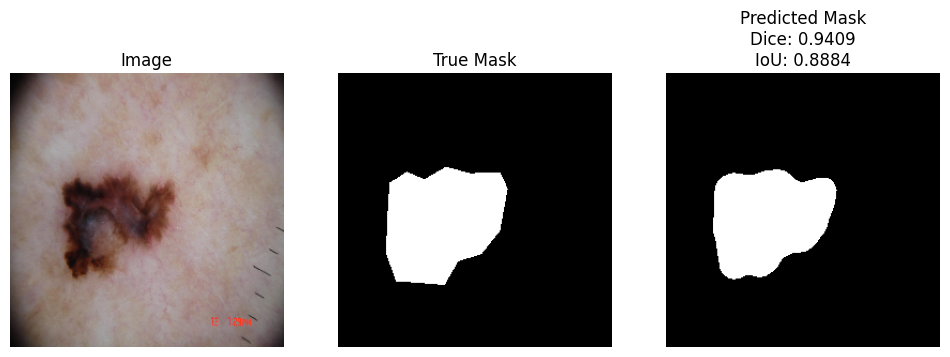

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


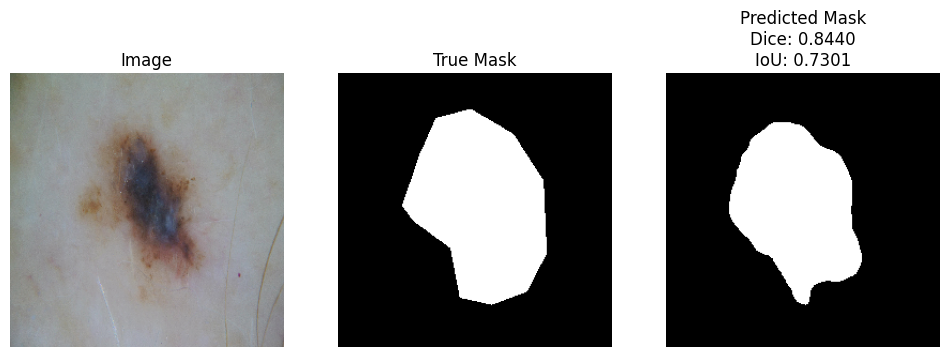

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


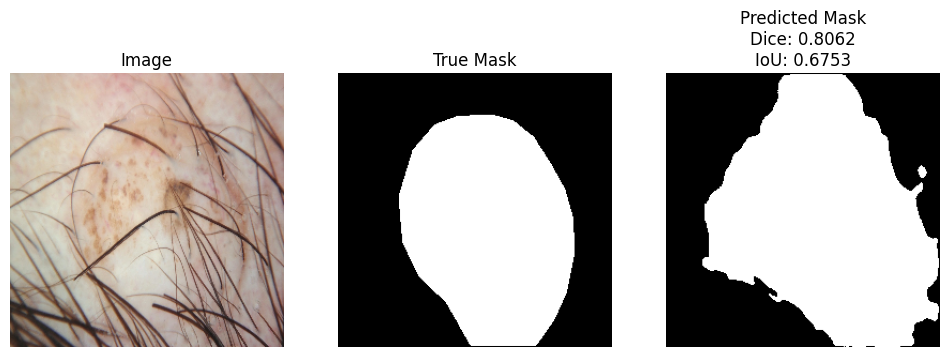

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt

# U-Net model definition
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Function to load and preprocess images and masks
def load_images_and_masks(image_dir, mask_dir, target_size=(256, 256)):
    images = []
    masks = []

    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(image_filenames, mask_filenames):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        image = img_to_array(load_img(img_path, target_size=target_size)) / 255.0
        mask = img_to_array(load_img(mask_path, target_size=target_size, color_mode="grayscale")) / 255.0

        images.append(image)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Dice coefficient calculation
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat) + smooth)

# Intersection over Union (IoU) Calculation
def intersection_over_union(y_true, y_pred, smooth=1e-6):
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    union = tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat) - intersection
    return (intersection + smooth) / (union + smooth)

# Display sample predictions
def display_sample_predictions(model, x_test, y_test, num_samples=5):
    indices = np.random.choice(len(x_test), num_samples, replace=False)

    for i in indices:
        image = x_test[i]
        true_mask = y_test[i]
        pred_mask = model.predict(image[np.newaxis, ...])[0]

        # Threshold the prediction
        pred_mask = (pred_mask > 0.5).astype(np.float32)

        dice_score = dice_coefficient(true_mask, pred_mask).numpy()
        iou_score = intersection_over_union(true_mask, pred_mask).numpy()

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(true_mask[:, :, 0], cmap="gray")
        plt.title("True Mask")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask[:, :, 0], cmap="gray")
        plt.title(f"Predicted Mask\nDice: {dice_score:.4f}\nIoU: {iou_score:.4f}")
        plt.axis("off")

        plt.show()

# Calculate Dice coefficient and IoU for the entire test set
def evaluate_metrics_on_test_set(model, x_test, y_test):
    dice_scores = []
    iou_scores = []
    for i in range(len(x_test)):
        true_mask = y_test[i]
        pred_mask = model.predict(x_test[i][np.newaxis, ...])[0]
        pred_mask = (pred_mask > 0.5).astype(np.float32)

        dice_scores.append(dice_coefficient(true_mask, pred_mask).numpy())
        iou_scores.append(intersection_over_union(true_mask, pred_mask).numpy())

    mean_dice = np.mean(dice_scores)
    mean_iou = np.mean(iou_scores)
    print(f"Mean Dice Coefficient on Test Set: {mean_dice:.4f}")
    print(f"Mean IoU on Test Set: {mean_iou:.4f}")

# Load the training and testing data
train_image_dir = "/content/drive/MyDrive/ISIC 2016/train"
train_mask_dir = "/content/drive/MyDrive/ISIC 2016/train_masks"
test_image_dir = "/content/drive/MyDrive/ISIC 2016/test"
test_mask_dir = "/content/drive/MyDrive/ISIC 2016/test_masks"

x_train, y_train = load_images_and_masks(train_image_dir, train_mask_dir)
x_test, y_test = load_images_and_masks(test_image_dir, test_mask_dir)

# Build and compile the U-Net model
input_size = (256, 256, 3)
model = unet_model(input_size=input_size)
model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=16
)

# Save the trained model
model.save("/content/drive/MyDrive/unet_model.h5")

# Display some predictions and Dice scores
display_sample_predictions(model, x_test, y_test, num_samples=5)

# Evaluate and display Dice and IoU on the test set
evaluate_metrics_on_test_set(model, x_test, y_test)


**DFCA-U-NET trained with ISIC 2016** (900 train 379 test)



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


57/57 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.6541 - loss: 0.6589 - val_accuracy: 0.7182 - val_loss: 0.5446
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 89s 958ms/step - accuracy: 0.7383 - loss: 0.5090 - val_accuracy: 0.8327 - val_loss: 0.4571
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 54s 946ms/step - accuracy: 0.8362 - loss: 0.4333 - val_accuracy: 0.8882 - val_loss: 0.3197
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 54s 954ms/step - accuracy: 0.8673 - loss: 0.3488 - val_accuracy: 0.8822 - val_loss: 0.3139
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 957ms/step - accuracy: 0.8858 - loss: 0.3065 - val_accuracy: 0.8967 - val_loss: 0.2744
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 79s 897ms/step - accuracy: 0.8926 - loss: 0.2888 - val_accuracy: 0.9090 - val_loss: 0.2548
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 85s 954ms/step - accuracy: 0.9062 - loss: 0.2678 - val_accuracy: 0.9099 - val_loss: 0.2413
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 955ms/step - accuracy: 0.9095 - loss: 0.2514 - val_accuracy: 0.9038 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


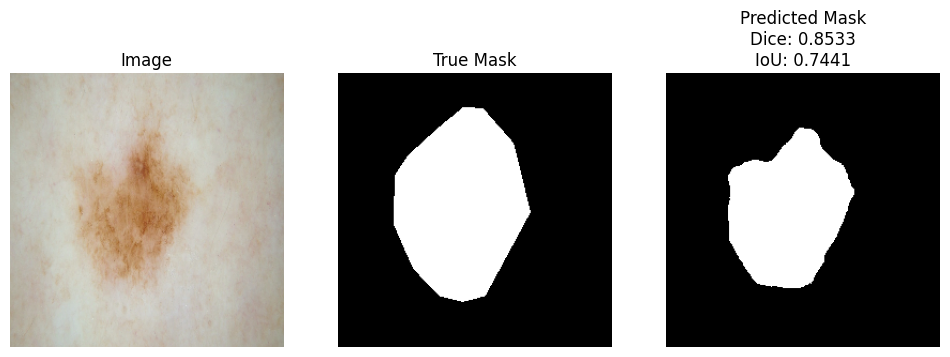

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


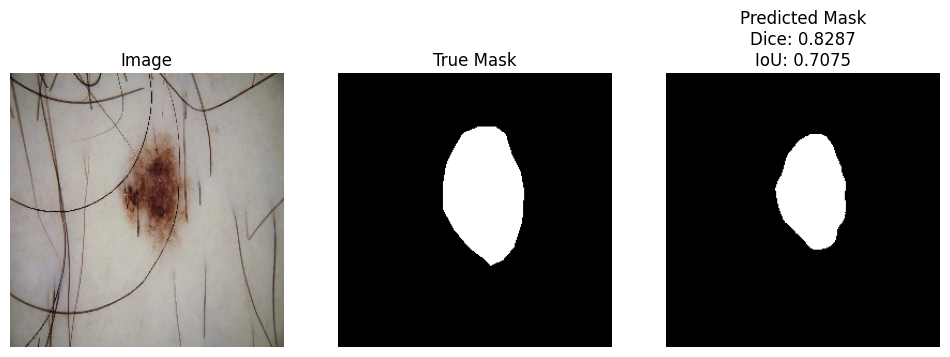

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


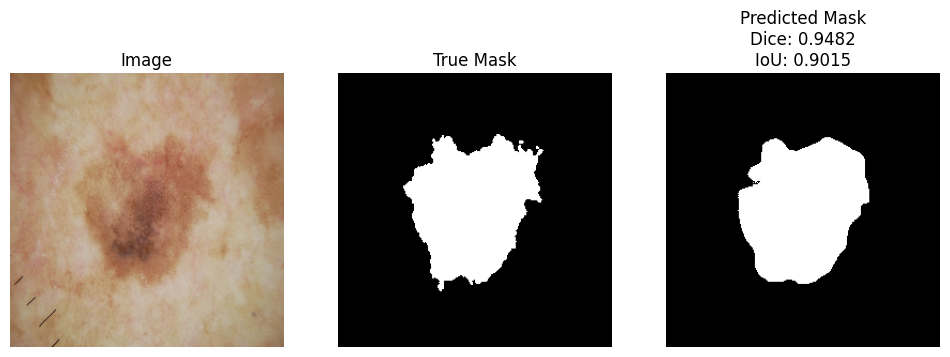

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


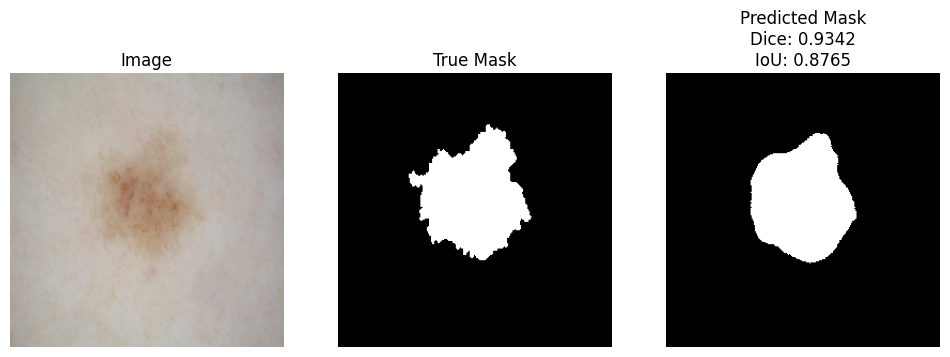

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


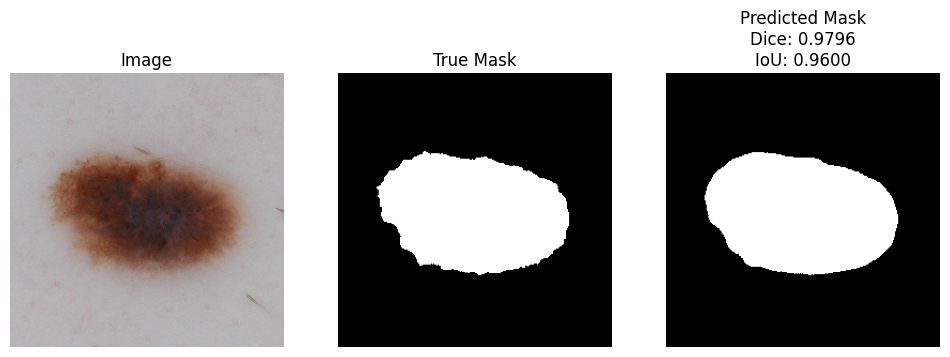

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt

# U-Net model definition
# DFCA Layer (Dynamic Feature Contextual Activation)
class DFCA(layers.Layer):
    def __init__(self, channels):
        super(DFCA, self).__init__()
        self.channels = channels
        self.fc = models.Sequential([
            layers.Flatten(),
            layers.Dense(channels // 2, activation='relu'),
            layers.Dense(channels, activation='sigmoid')
        ])

    def call(self, inputs):
        batch_size, height, width, channels = inputs.shape
        context = tf.reduce_mean(inputs, axis=(1, 2))  # Global Context: Mean across spatial dimensions
        context = self.fc(context)  # Fully connected layer to get scaling factor for channels
        context = tf.reshape(context, (-1, 1, 1, channels))  # Reshape to match input dimensions
        return inputs * context  # Apply feature scaling using context

# U-Net model definition with DFCA
def unet_model_with_dfca(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = DFCA(64)(c1)  # Apply DFCA after the first convolution
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = DFCA(128)(c2)  # Apply DFCA after the second convolution
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = DFCA(256)(c3)  # Apply DFCA after the third convolution
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = DFCA(512)(c4)  # Apply DFCA after the fourth convolution
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    c6 = DFCA(512)(c6)  # Apply DFCA after the sixth convolution

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    c7 = DFCA(256)(c7)  # Apply DFCA after the seventh convolution

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    c8 = DFCA(128)(c8)  # Apply DFCA after the eighth convolution

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    c9 = DFCA(64)(c9)  # Apply DFCA after the ninth convolution

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Function to load and preprocess images and masks
def load_images_and_masks(image_dir, mask_dir, target_size=(256, 256)):
    images = []
    masks = []

    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(image_filenames, mask_filenames):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # Load and normalize images
        image = img_to_array(load_img(img_path, target_size=target_size)) / 255.0
        mask = img_to_array(load_img(mask_path, target_size=target_size, color_mode="grayscale")) / 255.0

        images.append(image)
        masks.append(mask)

    # Convert lists to numpy arrays
    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)

    # Ensure masks have the correct shape (num_samples, 256, 256, 1)
    masks = np.expand_dims(masks, axis=-1)

    return images, masks

# Dice coefficient calculation
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat) + smooth)

# Intersection over Union (IoU) Calculation
def intersection_over_union(y_true, y_pred, smooth=1e-6):
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    union = tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat) - intersection
    return (intersection + smooth) / (union + smooth)

# Display sample predictions
def display_sample_predictions(model, x_test, y_test, num_samples=5):
    indices = np.random.choice(len(x_test), num_samples, replace=False)

    for i in indices:
        image = x_test[i]
        true_mask = y_test[i]
        pred_mask = model.predict(image[np.newaxis, ...])[0]

        # Threshold the prediction
        pred_mask = (pred_mask > 0.5).astype(np.float32)

        dice_score = dice_coefficient(true_mask, pred_mask).numpy()
        iou_score = intersection_over_union(true_mask, pred_mask).numpy()

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(true_mask[:, :, 0], cmap="gray")
        plt.title("True Mask")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask[:, :, 0], cmap="gray")
        plt.title(f"Predicted Mask\nDice: {dice_score:.4f}\nIoU: {iou_score:.4f}")
        plt.axis("off")

        plt.show()

# Calculate Dice coefficient and IoU for the entire test set
def evaluate_metrics_on_test_set(model, x_test, y_test):
    dice_scores = []
    iou_scores = []
    for i in range(len(x_test)):
        true_mask = y_test[i]
        pred_mask = model.predict(x_test[i][np.newaxis, ...])[0]
        pred_mask = (pred_mask > 0.5).astype(np.float32)

        dice_scores.append(dice_coefficient(true_mask, pred_mask).numpy())
        iou_scores.append(intersection_over_union(true_mask, pred_mask).numpy())

    mean_dice = np.mean(dice_scores)
    mean_iou = np.mean(iou_scores)
    print(f"Mean Dice Coefficient on Test Set: {mean_dice:.4f}")
    print(f"Mean IoU on Test Set: {mean_iou:.4f}")

# Load the training and testing data
train_image_dir = "/content/drive/MyDrive/ISIC 2016/train"
train_mask_dir = "/content/drive/MyDrive/ISIC 2016/train_masks"
test_image_dir = "/content/drive/MyDrive/ISIC 2016/test"
test_mask_dir = "/content/drive/MyDrive/ISIC 2016/test_masks"

x_train, y_train = load_images_and_masks(train_image_dir, train_mask_dir)
x_test, y_test = load_images_and_masks(test_image_dir, test_mask_dir)

# Build and compile the U-Net model
input_size = (256, 256, 3)
model = unet_model_with_dfca(input_size=input_size)
model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=16
)

# Save the trained model
model.save("/content/drive/MyDrive/unet_model_last.h5")

# Display some predictions and Dice scores
display_sample_predictions(model, x_test, y_test, num_samples=5)

# Evaluate and display Dice and IoU on the test set
evaluate_metrics_on_test_set(model, x_test, y_test)


In [ ]:
# Get final loss and accuracy
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Final Training Loss: 0.0791
Final Validation Loss: 0.1380
Final Training Accuracy: 0.9665
Final Validation Accuracy: 0.9499


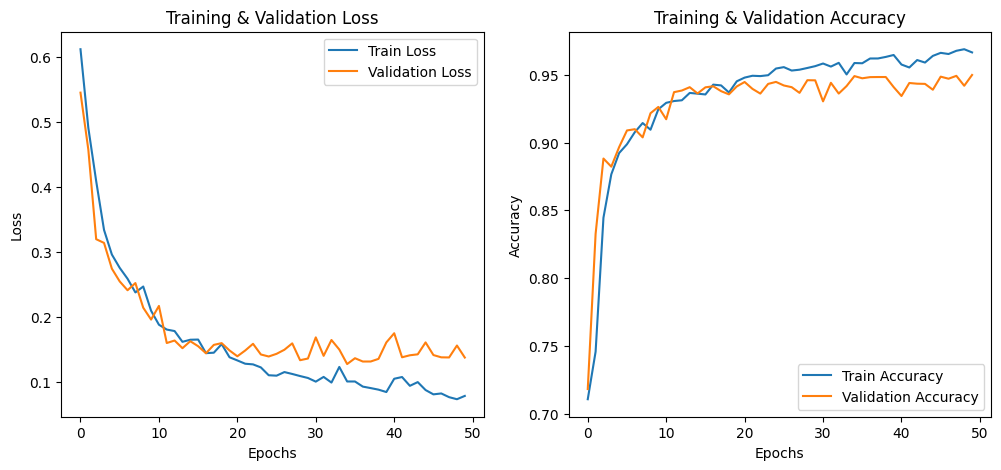

In [ ]:
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


**DFCA-U-NET trained with ISIC 2016 + augmented images (724)** (1624 train 379 test)

In [ ]:
import os

# Define the directory containing images
image_dir = '/content/drive/MyDrive/BestMask'

# Count the number of images in the directory
image_count = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])

image_count


1624

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


102/102 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.6724 - loss: 0.6196 - val_accuracy: 0.8314 - val_loss: 0.4012
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 134s 854ms/step - accuracy: 0.8801 - loss: 0.3299 - val_accuracy: 0.8817 - val_loss: 0.3015
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 145s 886ms/step - accuracy: 0.9057 - loss: 0.2583 - val_accuracy: 0.8959 - val_loss: 0.2768
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 885ms/step - accuracy: 0.9258 - loss: 0.2179 - val_accuracy: 0.8954 - val_loss: 0.2845
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 885ms/step - accuracy: 0.9250 - loss: 0.2098 - val_accuracy: 0.9001 - val_loss: 0.2814
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 884ms/step - accuracy: 0.9317 - loss: 0.1906 - val_accuracy: 0.9197 - val_loss: 0.2203
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 886ms/step - accuracy: 0.9396 - loss: 0.1613 - val_accuracy: 0.9190 - val_loss: 0.2119
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 886ms/step - accuracy: 0.9439 - loss: 0.1500 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


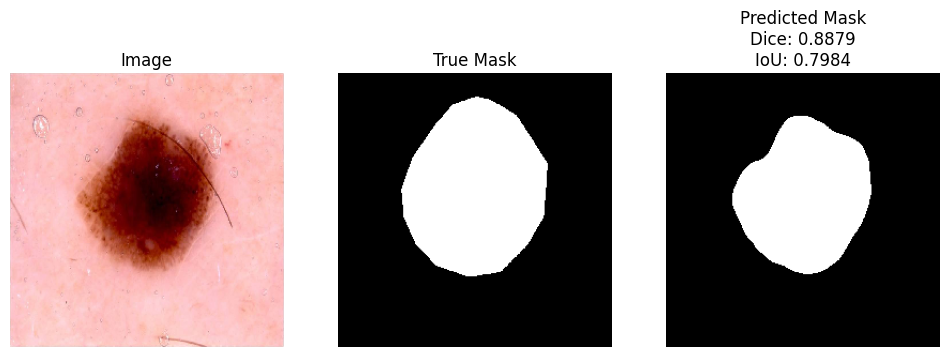

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


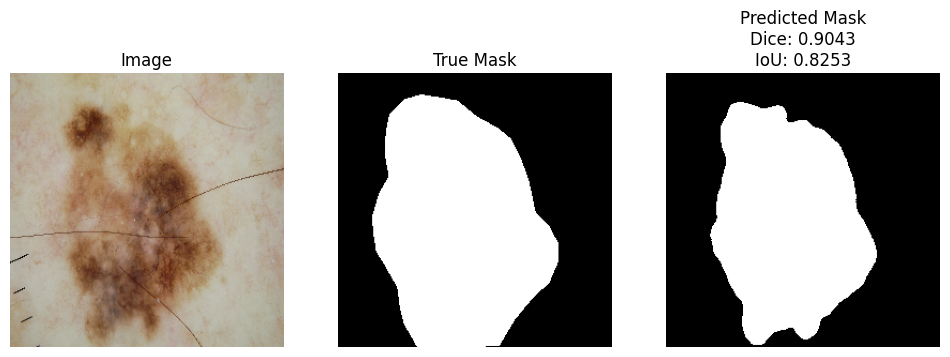

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


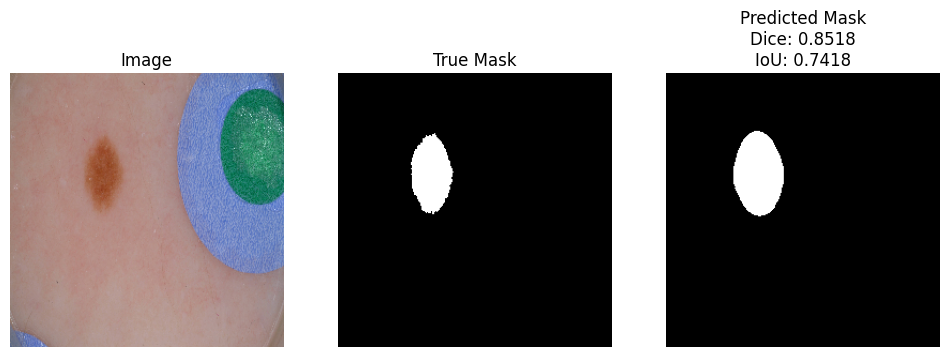

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


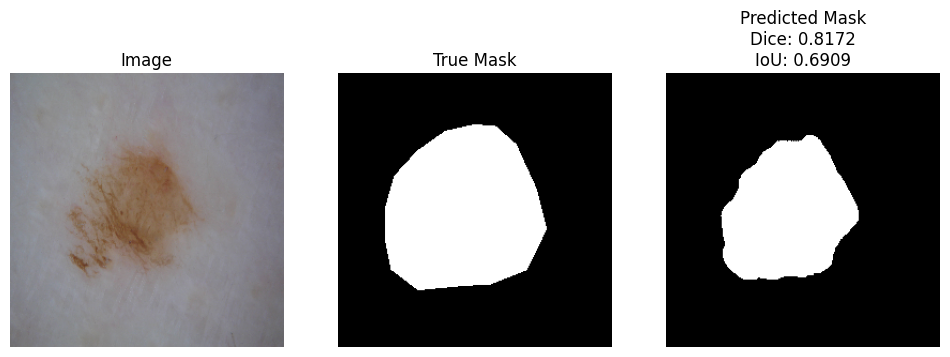

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


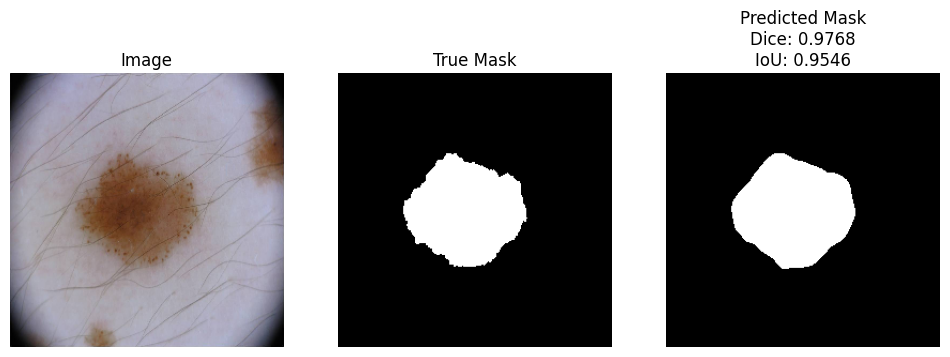

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt

# U-Net model definition
# DFCA Layer (Dynamic Feature Contextual Activation)
class DFCA(layers.Layer):
    def __init__(self, channels):
        super(DFCA, self).__init__()
        self.channels = channels
        self.fc = models.Sequential([
            layers.Flatten(),
            layers.Dense(channels // 2, activation='relu'),
            layers.Dense(channels, activation='sigmoid')
        ])

    def call(self, inputs):
        batch_size, height, width, channels = inputs.shape
        context = tf.reduce_mean(inputs, axis=(1, 2))  # Global Context: Mean across spatial dimensions
        context = self.fc(context)  # Fully connected layer to get scaling factor for channels
        context = tf.reshape(context, (-1, 1, 1, channels))  # Reshape to match input dimensions
        return inputs * context  # Apply feature scaling using context

# U-Net model definition with DFCA
def unet_model_with_dfca(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = DFCA(64)(c1)  # Apply DFCA after the first convolution
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = DFCA(128)(c2)  # Apply DFCA after the second convolution
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = DFCA(256)(c3)  # Apply DFCA after the third convolution
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = DFCA(512)(c4)  # Apply DFCA after the fourth convolution
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)
    c6 = DFCA(512)(c6)  # Apply DFCA after the sixth convolution

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)
    c7 = DFCA(256)(c7)  # Apply DFCA after the seventh convolution

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)
    c8 = DFCA(128)(c8)  # Apply DFCA after the eighth convolution

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)
    c9 = DFCA(64)(c9)  # Apply DFCA after the ninth convolution

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Function to load and preprocess images and masks
def load_images_and_masks(image_dir, mask_dir, target_size=(256, 256)):
    images = []
    masks = []

    image_filenames = sorted(os.listdir(image_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(image_filenames, mask_filenames):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # Load and normalize images
        image = img_to_array(load_img(img_path, target_size=target_size)) / 255.0
        mask = img_to_array(load_img(mask_path, target_size=target_size, color_mode="grayscale")) / 255.0

        images.append(image)
        masks.append(mask)

    # Convert lists to numpy arrays
    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)

    # Ensure masks have the correct shape (num_samples, 256, 256, 1)
    masks = np.expand_dims(masks, axis=-1)

    return images, masks

# Dice coefficient calculation
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat) + smooth)

# Intersection over Union (IoU) Calculation
def intersection_over_union(y_true, y_pred, smooth=1e-6):
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat)
    union = tf.reduce_sum(y_true_flat) + tf.reduce_sum(y_pred_flat) - intersection
    return (intersection + smooth) / (union + smooth)

# Display sample predictions
def display_sample_predictions(model, x_test, y_test, num_samples=5):
    indices = np.random.choice(len(x_test), num_samples, replace=False)

    for i in indices:
        image = x_test[i]
        true_mask = y_test[i]
        pred_mask = model.predict(image[np.newaxis, ...])[0]

        # Threshold the prediction
        pred_mask = (pred_mask > 0.5).astype(np.float32)

        dice_score = dice_coefficient(true_mask, pred_mask).numpy()
        iou_score = intersection_over_union(true_mask, pred_mask).numpy()

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(true_mask[:, :, 0], cmap="gray")
        plt.title("True Mask")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask[:, :, 0], cmap="gray")
        plt.title(f"Predicted Mask\nDice: {dice_score:.4f}\nIoU: {iou_score:.4f}")
        plt.axis("off")

        plt.show()

# Calculate Dice coefficient and IoU for the entire test set
def evaluate_metrics_on_test_set(model, x_test, y_test):
    dice_scores = []
    iou_scores = []
    for i in range(len(x_test)):
        true_mask = y_test[i]
        pred_mask = model.predict(x_test[i][np.newaxis, ...])[0]
        pred_mask = (pred_mask > 0.5).astype(np.float32)

        dice_scores.append(dice_coefficient(true_mask, pred_mask).numpy())
        iou_scores.append(intersection_over_union(true_mask, pred_mask).numpy())

    mean_dice = np.mean(dice_scores)
    mean_iou = np.mean(iou_scores)
    print(f"Mean Dice Coefficient on Test Set: {mean_dice:.4f}")
    print(f"Mean IoU on Test Set: {mean_iou:.4f}")

# Load the training and testing data
train_image_dir = "/content/drive/MyDrive/BestImage"
train_mask_dir = "/content/drive/MyDrive/BestMask"
test_image_dir = "/content/drive/MyDrive/ISIC 2016/test"
test_mask_dir = "/content/drive/MyDrive/ISIC 2016/test_masks"

x_train, y_train = load_images_and_masks(train_image_dir, train_mask_dir)
x_test, y_test = load_images_and_masks(test_image_dir, test_mask_dir)

# Build and compile the U-Net model
input_size = (256, 256, 3)
model = unet_model_with_dfca(input_size=input_size)
model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=16
)

# Save the trained model
model.save("/content/drive/MyDrive/unet_model_DFCA_22_best2.h5")

# Display some predictions and Dice scores
display_sample_predictions(model, x_test, y_test, num_samples=5)

# Evaluate and display Dice and IoU on the test set
evaluate_metrics_on_test_set(model, x_test, y_test)


In [ ]:
# Get final loss and accuracy
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Final Training Loss: 0.0395
Final Validation Loss: 0.1669
Final Training Accuracy: 0.9834
Final Validation Accuracy: 0.9513


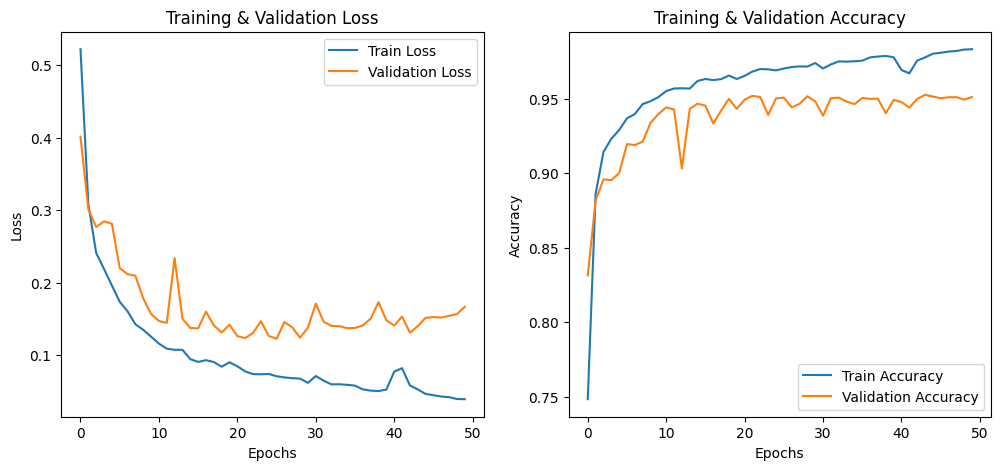

In [ ]:
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()
